In [2]:
import omicverse as ov
ov.plot_set()

## 10x

In [2]:
import os
tar_name=[i for i in os.listdir('data/mouse_atlas_10x') if 'tar.gz' in i]
tar_name

['GSM3040912_Muscle-10X_P7_14.tar.gz',
 'GSM3040898_Liver-10X_P7_0.tar.gz',
 'GSM3040911_Mammary-10X_P7_13.tar.gz',
 'GSM3040890_Tongue-10X_P4_0.tar.gz',
 'GSM3040913_Muscle-10X_P7_15.tar.gz',
 'GSM3040899_Liver-10X_P7_1.tar.gz',
 'GSM3040914_Lung-10X_P8_12.tar.gz',
 'GSM3040892_Liver-10X_P4_2.tar.gz',
 'GSM3040901_Marrow-10X_P7_3.tar.gz',
 'GSM3040906_Lung-10X_P7_8.tar.gz',
 'GSM3040894_Bladder-10X_P4_4.tar.gz',
 'GSM3040893_Bladder-10X_P4_3.tar.gz',
 'GSM3040891_Tongue-10X_P4_1.tar.gz',
 'GSM3040904_Spleen-10X_P7_6.tar.gz',
 'GSM3040909_Thymus-10X_P7_11.tar.gz',
 'GSM3040907_Lung-10X_P7_9.tar.gz',
 'GSM3040895_Kidney-10X_P4_5.tar.gz',
 'GSM3040915_Lung-10X_P8_13.tar.gz',
 'GSM3040902_Heart-10X_P7_4.tar.gz',
 'GSM3040896_Kidney-10X_P4_6.tar.gz',
 'GSM3040905_Bladder-10X_P7_7.tar.gz',
 'GSM3040900_Marrow-10X_P7_2.tar.gz',
 'GSM3040908_Tongue-10X_P7_10.tar.gz',
 'GSM3040897_Spleen-10X_P4_7.tar.gz',
 'GSM3040903_Kidney-10X_P7_5.tar.gz',
 'GSM3040910_Mammary-10X_P7_12.tar.gz',
 'GSM304091

In [ ]:
for t in tar_name:
    print(f'cd data/mouse_atlas_10x; tar -zxvf {t}')
    os.system(f'cd data/mouse_atlas_10x; tar -zxvf {t}')

In [6]:
sample_name=[i for i in os.listdir('data/mouse_atlas_10x') if 'tar' not in i]
sample_name

['Bladder-10X_P4_3',
 'Mammary-10X_P7_12',
 'Thymus-10X_P7_11',
 'Muscle-10X_P7_14',
 'Liver-10X_P7_0',
 'Kidney-10X_P4_5',
 'Spleen-10X_P7_6',
 'Lung-10X_P8_12',
 'Lung-10X_P7_8',
 'Trachea-10X_P8_14',
 'Lung-10X_P7_9',
 'Trachea-10X_P8_15',
 'Mammary-10X_P7_13',
 'Bladder-10X_P4_4',
 'Spleen-10X_P4_7',
 'Tongue-10X_P4_0',
 'Kidney-10X_P4_6',
 'Kidney-10X_P7_5',
 'Liver-10X_P4_2',
 'Muscle-10X_P7_15',
 'Heart-10X_P7_4',
 'Marrow-10X_P7_3',
 'Marrow-10X_P7_2',
 'Bladder-10X_P7_7',
 'Tongue-10X_P4_1',
 'Lung-10X_P8_13',
 'Liver-10X_P7_1',
 'Tongue-10X_P7_10']

In [8]:
import scanpy as sc


--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.


AnnData object with n_obs × n_vars = 1949 × 23433
    var: 'gene_ids'

In [ ]:
import pandas as pd
import numpy as np
import scanpy as sc
from tqdm import tqdm
for o in tqdm(sample_name):
    organ_ad=sc.read_10x_mtx(f'data/mouse_atlas_10x/{o}')
    organ_ad.var.index.name='gene'
    organ_ad.var_names_make_unique()
    organ_ad.write(f'data/mouse_h5ad_10x/{o}_10x_raw.h5ad',compression='gzip')

In [11]:
for idx,o in enumerate(sample_name):
    if idx==0:
        organ_ad=sc.read(f'data/mouse_h5ad_10x/{o}_10x_raw.h5ad')
        organ_ad.obs['sample']=o
        organ_ad.obs['organ']=o.split('-')[0]
        organ_ad.obs.index=[o+':'+i for i in organ_ad.obs.index]
    else:
        organ_ad1=sc.read(f'data/mouse_h5ad_10x/{o}_10x_raw.h5ad')
        organ_ad1.obs['sample']=o
        organ_ad1.obs['organ']=o.split('-')[0]
        organ_ad1.obs.index=[o+':'+i for i in organ_ad1.obs.index]
        organ_ad=sc.concat([organ_ad,organ_ad1],merge='same')
    

In [13]:
sc.pp.filter_cells(organ_ad, min_genes=200)
sc.pp.filter_genes(organ_ad, min_cells=3)
organ_ad

filtered out 2931338 cells that have less than 200 genes expressed
filtered out 4425 genes that are detected in less than 3 cells


AnnData object with n_obs × n_vars = 59470 × 19008
    obs: 'sample', 'organ', 'n_genes'
    var: 'gene_ids', 'n_cells'

In [14]:
organ_ad.write('data/mouse_10x.h5ad',compression='gzip')

In [9]:
organ_name=list(set(organ_ad.obs['organ'].tolist()))

In [ ]:
#re_dicts={}
import gc
import numpy as np
human_std={}
human_median={}
human_max={}
human_min={}
human_mean={}
for o in tqdm(organ_name):
    adata=organ_ad[organ_ad.obs['organ']==o]
    adata.layers['counts']=adata.X.copy()
    sc.pp.normalize_total(adata)
    sc.pp.log1p(adata)
    sc.pp.highly_variable_genes(adata, n_top_genes=10000, 
                                flavor="seurat_v3",layer='counts',)
    adata=adata[:,adata.var['highly_variable']==True]
    

    print('...stats')
    array=adata.X.toarray()
    del adata
    gc.collect()
    human_std[o]=np.std(array,axis=0)
    human_median[o]=np.median(array,axis=0)
    human_max[o]=np.max(array,axis=0)
    human_min[o]=np.min(array,axis=0)
    human_mean[o]=np.mean(array,axis=0)

    #adata.__delete__()

    del array

  #re_dicts[name]=re_dict
  #ret_gene=list(set(ret_gene) & set(gene))

In [17]:
for i in human_std.keys():
    if type(human_std[i])==list:
        continue
    human_std[i]=human_std[i].tolist()
    human_median[i]=human_median[i].tolist()
    human_max[i]=human_max[i].tolist()
    human_min[i]=human_min[i].tolist()
    human_mean[i]=human_mean[i].tolist()

In [24]:
import json

dict_json=json.dumps(human_std)#转化为json格式文件
with open('result/mouse_atlas_drop/std.json','w+') as file:
    file.write(dict_json)

dict_json=json.dumps(human_median)#转化为json格式文件
with open('result/mouse_atlas_drop/median.json','w+') as file:
    file.write(dict_json)

dict_json=json.dumps(human_max)#转化为json格式文件
with open('result/mouse_atlas_drop/max.json','w+') as file:
    file.write(dict_json)

dict_json=json.dumps(human_min)#转化为json格式文件
with open('result/mouse_atlas_drop/min.json','w+') as file:
    file.write(dict_json)

dict_json=json.dumps(human_mean)#转化为json格式文件
with open('result/mouse_atlas_drop/mean.json','w+') as file:
    file.write(dict_json)    

In [25]:
import json

def load_dict_from_json(filename):
    with open(filename, 'r') as file:
        dict_json = file.read()
        loaded_dict = json.loads(dict_json)  # Load the JSON format into a dictionary
    return loaded_dict

# Load each dictionary using the function
human_std = load_dict_from_json('result/mouse_atlas_drop/std.json')
human_median = load_dict_from_json('result/mouse_atlas_drop/median.json')
human_max = load_dict_from_json('result/mouse_atlas_drop/max.json')
human_min = load_dict_from_json('result/mouse_atlas_drop/min.json')
human_mean = load_dict_from_json('result/mouse_atlas_drop/mean.json')

In [18]:
import pandas as pd
import numpy as np
std_df=pd.DataFrame(columns=['var'])
for i in human_std.keys():
    a=np.std(human_std[i])
    std_df.loc[i]={'var':a}
std_df.head()

,var
Mammary,0.161688
Spleen,0.124342
Lung,0.160143
Heart,0.190389
Thymus,0.159962


In [20]:
from scipy import stats
human_max_pd=pd.DataFrame(index=human_max.keys())
for i in human_max.keys():
    human_max_test=[]
    mu_i=np.mean(human_max[i])
    sigma_i=np.std(human_max[i])
    count_i,bins_i=np.histogram(human_max[i],bins=100)
    y_i=stats.norm.pdf(bins_i, mu_i, sigma_i)
    for j in human_max.keys():
        mu_j=np.mean(human_max[j])
        sigma_j=np.std(human_max[j])
        count_j,bins_j=np.histogram(human_max[j],bins=100)
        y_j=stats.norm.pdf(bins_j, mu_j, sigma_j)
        human_max_test.append(stats.spearmanr(y_i,y_j)[0])
    human_max_pd[i]=human_max_test
human_max_pd.head()

,Liver,Thymus,Heart,Pancreas,Lung,Brain_Microglia,Muscle,Bladder,Marrow,Brain_Neurons,Mammary,Kidney,Colon,Fat,Trachea,Tongue,Spleen
Liver,1.000000,0.999453,0.851532,0.997868,1.000000,1.000000,0.997822,0.920769,0.955993,0.965149,0.991287,0.997868,0.987117,0.973314,0.987117,0.975317,1.000000
Thymus,0.999453,1.000000,0.867490,0.995201,0.999453,0.999453,0.999453,0.908107,0.964869,0.973034,0.995050,0.995201,0.981444,0.980186,0.981444,0.967758,0.999453
Heart,0.851532,0.867490,1.000000,0.817577,0.851532,0.851532,0.882714,0.593768,0.965894,0.956832,0.910844,0.817577,0.762062,0.946709,0.762062,0.722400,0.851532
Pancreas,0.997868,0.995201,0.817577,1.000000,0.997868,0.997868,0.991474,0.943273,0.935644,0.946709,0.980815,1.000000,0.995364,0.956832,0.995364,0.987408,0.997868
Lung,1.000000,0.999453,0.851532,0.997868,1.000000,1.000000,0.997822,0.920769,0.955993,0.965149,0.991287,0.997868,0.987117,0.973314,0.987117,0.975317,1.000000


In [21]:
import scanpy as sc
data_dict=dict(zip(human_max_pd.index,sc.pl.palettes.zeileis_28))

In [22]:
data_df = pd.DataFrame(data_dict.items(), columns=['index', 'Tissue'])
data_df=data_df.set_index(data_df.columns[0])

Text(0.5, 0.9, 'Max distribution Correlation')

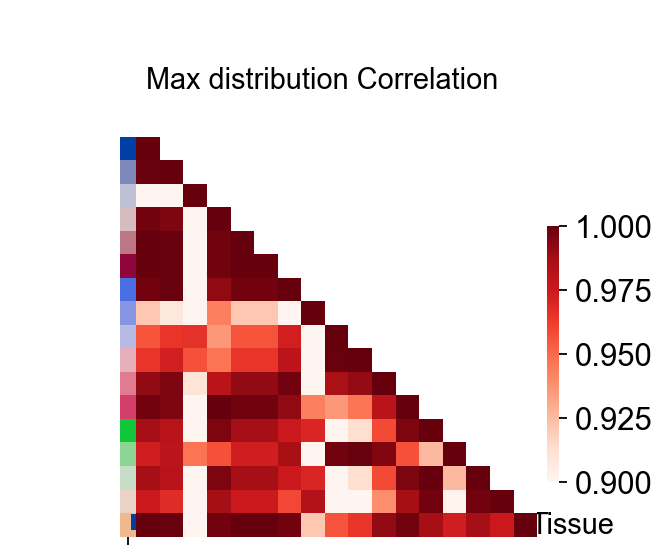

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
mask = np.array(human_max_pd)
mask[np.tril_indices_from(mask)] = False #下三角
g=sns.clustermap(human_max_pd,cmap='Reds',mask=mask,yticklabels=True,xticklabels=True,
           square=True,annot=False,vmax=1, vmin=0.9,col_cluster=False,row_cluster=False,
                 row_colors=data_df,col_colors=data_df
              )
g.fig.set_size_inches(4, 4)
g.ax_col_colors.set_position([0.20, 0.175, 0.6, 0.025]) 
g.ax_heatmap.set_xticks([])
g.ax_heatmap.set_yticks([])
g.cax.set_position([0.85, 0.25, 0.02, 0.4])  # Adjust the position as needed
g.ax_row_colors.xaxis.set_ticklabels([])
labels=g.ax_col_colors.yaxis.get_ticklabels()
plt.setp(labels, horizontalalignment='left',fontsize=13)
g.fig.suptitle('Max distribution Correlation',x=0.5,y=0.9,fontsize=13)
#plt.savefig("figures/fig_max_cor.png",dpi=300,bbox_inches = 'tight')
#plt.savefig("pdf/fig_max_cor.pdf",dpi=300,bbox_inches = 'tight')

In [23]:
from scipy import stats
human_median_pd=pd.DataFrame(index=human_median.keys())
for i in human_median.keys():
    human_median_test=[]
    mu_i=np.mean(human_median[i])
    sigma_i=np.std(human_median[i])
    count_i,bins_i=np.histogram(human_median[i],bins=100)
    y_i=stats.norm.pdf(bins_i, mu_i, sigma_i)
    for j in human_median.keys():
        mu_j=np.mean(human_median[j])
        sigma_j=np.std(human_median[j])
        count_j,bins_j=np.histogram(human_median[j],bins=100)
        y_j=stats.norm.pdf(bins_j, mu_j, sigma_j)
        human_median_test.append(stats.spearmanr(y_i,y_j)[0])
    human_median_pd[i]=human_median_test
human_median_pd.head()

,Mammary,Spleen,Lung,Heart,Thymus,Marrow,Trachea,Tongue,Liver,Bladder,Muscle,Kidney
Mammary,1.000000,1.000000,0.999988,1.000000,0.999942,0.999988,0.999988,0.999988,1.000000,0.999942,0.999988,1.000000
Spleen,1.000000,1.000000,0.999988,1.000000,0.999942,0.999988,0.999988,0.999988,1.000000,0.999942,0.999988,1.000000
Lung,0.999988,0.999988,1.000000,0.999988,0.999918,0.999965,1.000000,0.999965,0.999988,0.999918,1.000000,0.999988
Heart,1.000000,1.000000,0.999988,1.000000,0.999942,0.999988,0.999988,0.999988,1.000000,0.999942,0.999988,1.000000
Thymus,0.999942,0.999942,0.999918,0.999942,1.000000,0.999977,0.999918,0.999977,0.999942,1.000000,0.999918,0.999942


Text(0.5, 0.9, 'Median distribution Correlation')

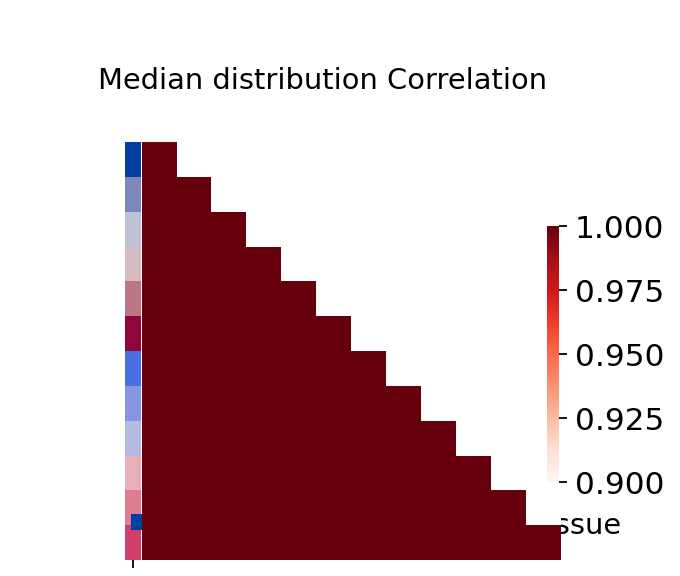

In [24]:
g=sns.clustermap(human_median_pd,cmap='Reds',mask=mask,yticklabels=True,xticklabels=True,
           square=True,annot=False,vmax=1, vmin=0.9,col_cluster=False,row_cluster=False,
                 row_colors=data_df,col_colors=data_df
              )
g.fig.set_size_inches(4, 4)
g.ax_col_colors.set_position([0.20, 0.175, 0.6, 0.025]) 
g.ax_heatmap.set_xticks([])
g.ax_heatmap.set_yticks([])
g.cax.set_position([0.85, 0.25, 0.02, 0.4])  # Adjust the position as needed
g.ax_row_colors.xaxis.set_ticklabels([])
labels=g.ax_col_colors.yaxis.get_ticklabels()
plt.setp(labels, horizontalalignment='left',fontsize=13)
g.fig.suptitle('Median distribution Correlation',x=0.5,y=0.9,fontsize=13)
#plt.savefig("figures/fig_median_cor.png",dpi=300,bbox_inches = 'tight')
#plt.savefig("pdf/fig_median_cor.pdf",dpi=300,bbox_inches = 'tight')

In [25]:
from scipy import stats
human_mean_pd=pd.DataFrame(index=human_mean.keys())
for i in human_mean.keys():
    human_mean_test=[]
    mu_i=np.mean(human_mean[i])
    sigma_i=np.std(human_mean[i])
    count_i,bins_i=np.histogram(human_mean[i],bins=100)
    y_i=stats.norm.pdf(bins_i, mu_i, sigma_i)
    for j in human_mean.keys():
        mu_j=np.mean(human_mean[j])
        sigma_j=np.std(human_mean[j])
        count_j,bins_j=np.histogram(human_mean[j],bins=100)
        y_j=stats.norm.pdf(bins_j, mu_j, sigma_j)
        human_mean_test.append(stats.spearmanr(y_i,y_j)[0])
    human_mean_pd[i]=human_mean_test
human_mean_pd.head()

,Mammary,Spleen,Lung,Heart,Thymus,Marrow,Trachea,Tongue,Liver,Bladder,Muscle,Kidney
Mammary,1.000000,1.000000,0.999918,0.999674,0.999487,0.999814,1.000000,0.999814,0.999977,0.999487,0.999977,0.999814
Spleen,1.000000,1.000000,0.999918,0.999674,0.999487,0.999814,1.000000,0.999814,0.999977,0.999487,0.999977,0.999814
Lung,0.999918,0.999918,1.000000,0.999872,0.999709,0.999965,0.999918,0.999965,0.999977,0.999709,0.999977,0.999965
Heart,0.999674,0.999674,0.999872,1.000000,0.999953,0.999965,0.999674,0.999965,0.999767,0.999953,0.999767,0.999965
Thymus,0.999487,0.999487,0.999709,0.999953,1.000000,0.999849,0.999487,0.999849,0.999581,1.000000,0.999581,0.999849


Text(0.5, 0.9, 'Mean distribution Correlation')

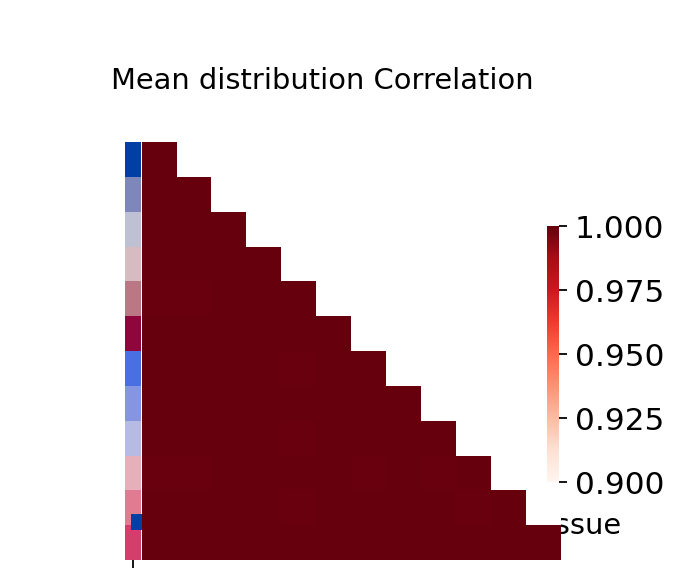

In [26]:
g=sns.clustermap(human_mean_pd,cmap='Reds',mask=mask,yticklabels=True,xticklabels=True,
           square=True,annot=False,vmax=1, vmin=0.9,col_cluster=False,row_cluster=False,
                 row_colors=data_df,col_colors=data_df
              )
g.fig.set_size_inches(4, 4)
g.ax_col_colors.set_position([0.20, 0.175, 0.6, 0.025]) 
g.ax_heatmap.set_xticks([])
g.ax_heatmap.set_yticks([])
g.cax.set_position([0.85, 0.25, 0.02, 0.4])  # Adjust the position as needed
g.ax_row_colors.xaxis.set_ticklabels([])
labels=g.ax_col_colors.yaxis.get_ticklabels()
plt.setp(labels, horizontalalignment='left',fontsize=13)
g.fig.suptitle('Mean distribution Correlation',x=0.5,y=0.9,fontsize=13)
#plt.savefig("figures/fig_mean_cor.png",dpi=300,bbox_inches = 'tight')
#plt.savefig("pdf/fig_mean_cor.pdf",dpi=300,bbox_inches = 'tight')

In [27]:
from scipy import stats
human_std_pd=pd.DataFrame(index=human_std.keys())
for i in human_std.keys():
    human_std_test=[]
    mu_i=np.mean(human_std[i])
    sigma_i=np.std(human_std[i])
    count_i,bins_i=np.histogram(human_std[i],bins=100)
    y_i=stats.norm.pdf(bins_i, mu_i, sigma_i)
    for j in human_std.keys():
        mu_j=np.mean(human_std[j])
        sigma_j=np.std(human_std[j])
        count_j,bins_j=np.histogram(human_std[j],bins=100)
        y_j=stats.norm.pdf(bins_j, mu_j, sigma_j)
        human_std_test.append(stats.spearmanr(y_i,y_j)[0])
    human_std_pd[i]=human_std_test
human_std_pd.head()

,Mammary,Spleen,Lung,Heart,Thymus,Marrow,Trachea,Tongue,Liver,Bladder,Muscle,Kidney
Mammary,1.00000,1.00000,1.00000,0.996540,0.993850,1.00000,0.999289,0.998462,1.00000,0.996540,0.999907,0.998462
Spleen,1.00000,1.00000,1.00000,0.996540,0.993850,1.00000,0.999289,0.998462,1.00000,0.996540,0.999907,0.998462
Lung,1.00000,1.00000,1.00000,0.996540,0.993850,1.00000,0.999289,0.998462,1.00000,0.996540,0.999907,0.998462
Heart,0.99654,0.99654,0.99654,1.000000,0.999476,0.99654,0.993628,0.999522,0.99654,1.000000,0.997449,0.999522
Thymus,0.99385,0.99385,0.99385,0.999476,1.000000,0.99385,0.990483,0.998090,0.99385,0.999476,0.995003,0.998090


Text(0.5, 0.9, 'Std distribution Correlation')

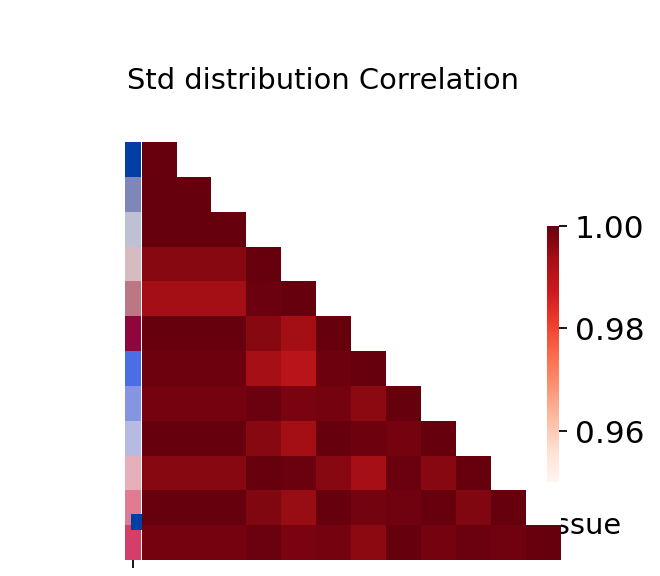

In [28]:
g=sns.clustermap(human_std_pd,cmap='Reds',mask=mask,yticklabels=True,xticklabels=True,
           square=True,annot=False,vmax=1, vmin=0.95,col_cluster=False,row_cluster=False,
                 row_colors=data_df,col_colors=data_df
              )
g.fig.set_size_inches(4, 4)
g.ax_col_colors.set_position([0.20, 0.175, 0.6, 0.025]) 
g.ax_heatmap.set_xticks([])
g.ax_heatmap.set_yticks([])
g.cax.set_position([0.85, 0.25, 0.02, 0.4])  # Adjust the position as needed
g.ax_row_colors.xaxis.set_ticklabels([])
labels=g.ax_col_colors.yaxis.get_ticklabels()
plt.setp(labels, horizontalalignment='left',fontsize=13)
g.fig.suptitle('Std distribution Correlation',x=0.5,y=0.9,fontsize=13)
#plt.savefig("figures/fig_std_cor.png",dpi=300,bbox_inches = 'tight')
#plt.savefig("pdf/fig_std_cor.pdf",dpi=300,bbox_inches = 'tight')

(array([ 0. ,  2.5,  5. ,  7.5, 10. ]),
 [Text(0.0, 0, '0.0'),
  Text(2.5, 0, '2.5'),
  Text(5.0, 0, '5.0'),
  Text(7.5, 0, '7.5'),
  Text(10.0, 0, '10.0')])

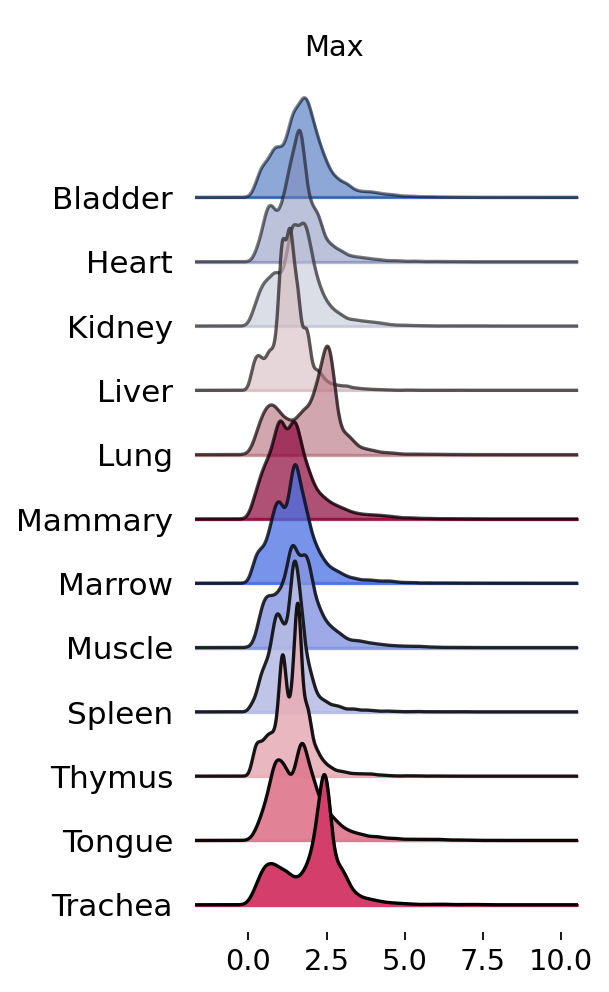

In [29]:
import joypy
df=pd.DataFrame(columns=['x','g'])
k=0
for i in human_max.keys():
  df1=pd.DataFrame()
  df1['x']=human_max[i]
  df1['g']=[j for j in [i.replace('TS_','')]*len(df1)]
  df1['x1']=[j for j in [k]*len(df1)]
  df1['x']=df1['x']+df1['x1']
  del df1['x1']
  df=pd.concat([df,df1])
  k+=0
corr_feature = ['x','g']
corr_df = df[corr_feature]
fig, axes = joypy.joyplot(corr_df,column = 'x', by='g', figsize=(4,6.5),
                          fill=True, fade=True,color=sc.pl.palettes.zeileis_28)
plt.suptitle('Max',fontsize=13,y=0.95,horizontalalignment='left') 
plt.xticks(fontsize=13)

In [30]:
corr_df.loc[corr_df['g']=='Liver','x'].values

array([1.04275298, 1.8276248 , 1.57486582, ..., 1.58638382, 1.55777371,
       2.88118768])

In [31]:
import numpy as np
import scipy.stats
p=corr_df.loc[corr_df['g']=='Liver','x'].values
q=corr_df.loc[corr_df['g']=='Tongue','x'].values
def KL_divergence(p,q):
    return scipy.stats.entropy(p, q)
print(KL_divergence(p,q)) # 0.011735745199107783
print(KL_divergence(q,p)) # 0.013183150978050884

def JS_divergence(p,q):
    M=(p+q)/2
    return 0.5*scipy.stats.entropy(p, M)+0.5*scipy.stats.entropy(q, M)

print(JS_divergence(p,q))  # 0.003093977084273652
print(JS_divergence(q,p)) # 0.24719159952098618
print(JS_divergence(p,p)) # 0.0

0.24683392955436717
0.26160597956467446
0.05922942358843211
0.05922942358843211
0.0


(array([0. , 0.5, 1. , 1.5]),
 [Text(0.0, 0, '0.0'),
  Text(0.5, 0, '0.5'),
  Text(1.0, 0, '1.0'),
  Text(1.5, 0, '1.5')])

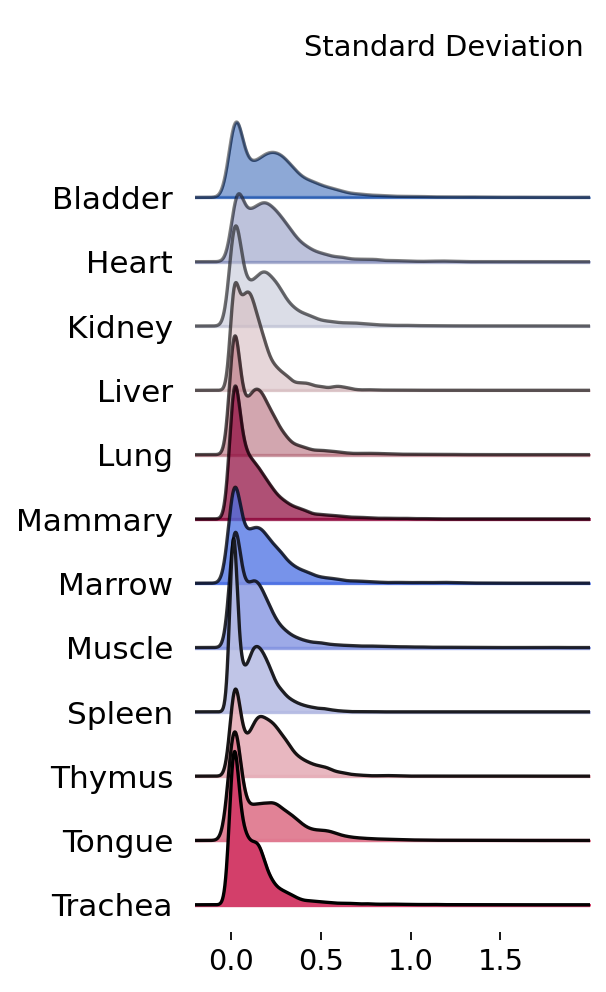

In [32]:
df=pd.DataFrame(columns=['x','g'])
k=0
for i in human_std.keys():
  df1=pd.DataFrame()
  df1['x']=human_std[i]
  df1['g']=[j for j in [i.replace('TS_','')]*len(df1)]
  df1['x1']=[j for j in [k]*len(df1)]
  df1['x']=df1['x']+df1['x1']
  del df1['x1']
  df=pd.concat([df,df1])
  k+=0

import joypy
corr_feature = ['x','g']
corr_df = df[corr_feature]
fig, axes = joypy.joyplot(corr_df,column = 'x', by='g', figsize=(4,6.5),x_range=[-0.2,2],
                          fill=True, fade=True,color=sc.pl.palettes.zeileis_28)
plt.suptitle('Standard Deviation',fontsize=13,y=0.95,horizontalalignment='left') 
plt.xticks(fontsize=13)

In [33]:
import numpy as np
import scipy.stats
p=corr_df.loc[corr_df['g']=='Liver','x'].values
q=corr_df.loc[corr_df['g']=='Tongue','x'].values
def KL_divergence(p,q):
    return scipy.stats.entropy(p, q)
print(KL_divergence(p,q)) # 0.011735745199107783
print(KL_divergence(q,p)) # 0.013183150978050884

def JS_divergence(p,q):
    M=(p+q)/2
    return 0.5*scipy.stats.entropy(p, M)+0.5*scipy.stats.entropy(q, M)

print(JS_divergence(p,q))  # 0.003093977084273652
print(JS_divergence(q,p)) # 0.24719159952098618
print(JS_divergence(p,p)) # 0.0

1.220359072088457
1.0449691958389535
0.2192896639041248
0.2192896639041248
0.0


(array([0. , 0.5, 1. ]),
 [Text(0.0, 0, '0.0'), Text(0.5, 0, '0.5'), Text(1.0, 0, '1.0')])

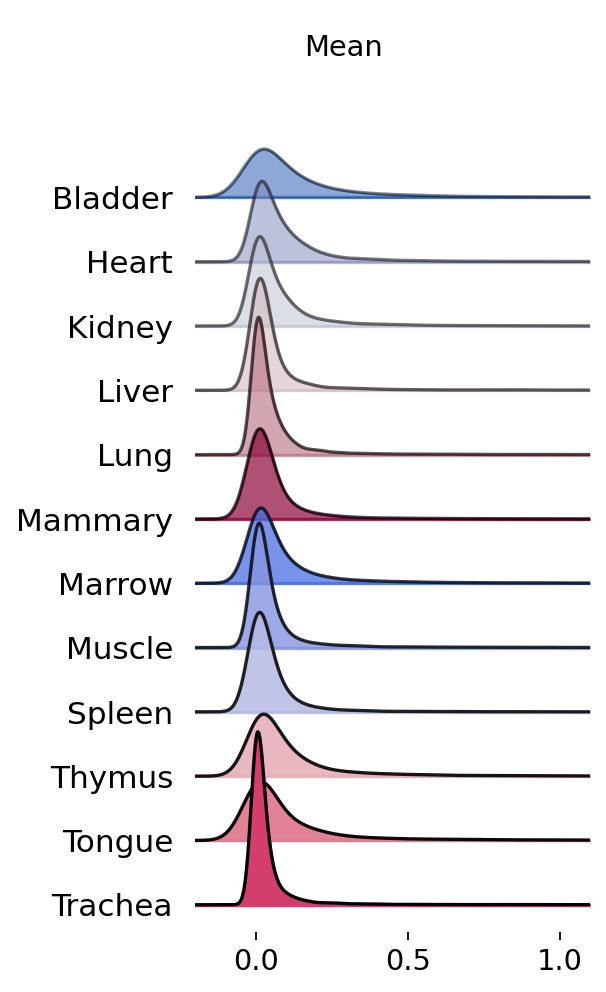

In [34]:
df=pd.DataFrame(columns=['x','g'])
k=0
for i in human_mean.keys():
  df1=pd.DataFrame()
  df1['x']=human_mean[i]
  df1['g']=[j for j in [i.replace('TS_','')]*len(df1)]
  df1['x1']=[j for j in [k]*len(df1)]
  df1['x']=df1['x']+df1['x1']
  del df1['x1']
  df=pd.concat([df,df1])
  k+=0

import joypy
corr_feature = ['x','g']
corr_df = df[corr_feature]
fig, axes = joypy.joyplot(corr_df,column = 'x', by='g', figsize=(4,6.5),x_range=[-0.2,1.1],
                          fill=True, fade=True,color=sc.pl.palettes.zeileis_28)
plt.suptitle('Mean',fontsize=13,y=0.95,horizontalalignment='left') 
plt.xticks(fontsize=13)

In [73]:
import numpy as np
import scipy.stats
p=corr_df.loc[corr_df['g']=='Liver','x'].values
q=corr_df.loc[corr_df['g']=='Tongue','x'].values
def KL_divergence(p,q):
    return scipy.stats.entropy(p, q)
print(KL_divergence(p,q)) # 0.011735745199107783
print(KL_divergence(q,p)) # 0.013183150978050884

def JS_divergence(p,q):
    M=(p+q)/2
    return 0.5*scipy.stats.entropy(p, M)+0.5*scipy.stats.entropy(q, M)

print(JS_divergence(p,q))  # 0.003093977084273652
print(JS_divergence(q,p)) # 0.24719159952098618
print(JS_divergence(p,p)) # 0.0

2.572868045211641
2.3337636364274212
0.35950477889216004
0.35950477889216004
0.0


Text(0.5, 0.95, 'Median')

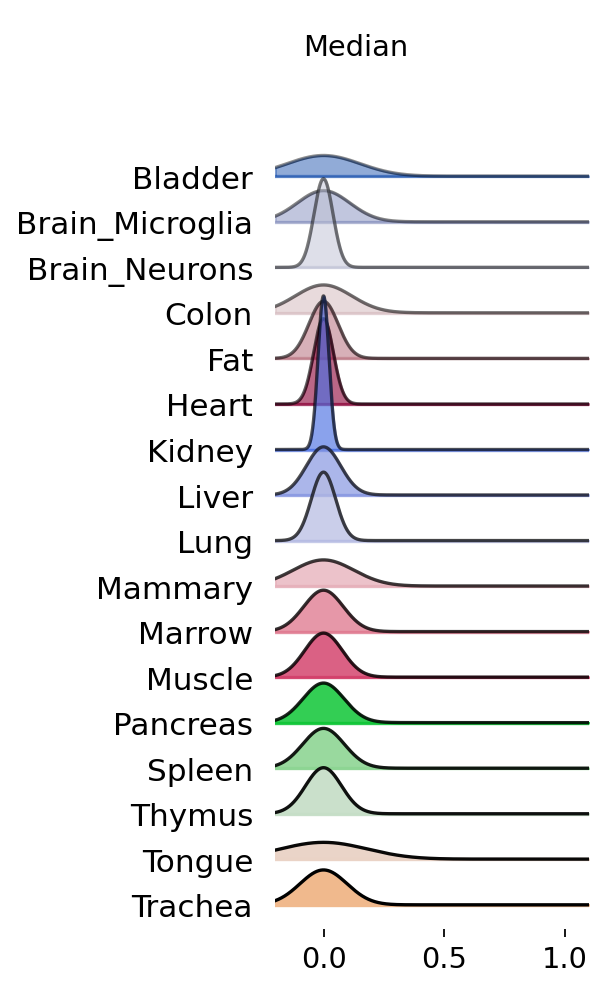

In [74]:
df=pd.DataFrame(columns=['x','g'])
k=0
for i in human_median.keys():
  df1=pd.DataFrame()
  df1['x']=human_median[i]
  df1['g']=[j for j in [i.replace('TS_','')]*len(df1)]
  df1['x1']=[j for j in [k]*len(df1)]
  df1['x']=df1['x']+df1['x1']
  del df1['x1']
  df=pd.concat([df,df1])
  k+=0

import joypy
corr_feature = ['x','g']
corr_df = df[corr_feature]
fig, axes = joypy.joyplot(corr_df,column = 'x', by='g', figsize=(4,6.5),x_range=[-0.2,1.1],
                          fill=True, fade=True,color=sc.pl.palettes.zeileis_28)
plt.xticks(fontsize=13)
#plt.yticks(fontsize=12)
plt.suptitle('Median',fontsize=13,y=0.95,horizontalalignment='left') 

In [75]:
import numpy as np
import scipy.stats
p=corr_df.loc[corr_df['g']=='Liver','x'].values
q=corr_df.loc[corr_df['g']=='Tongue','x'].values
def KL_divergence(p,q):
    return scipy.stats.entropy(p, q)
print(KL_divergence(p,q)) # 0.011735745199107783
print(KL_divergence(q,p)) # 0.013183150978050884

def JS_divergence(p,q):
    M=(p+q)/2
    return 0.5*scipy.stats.entropy(p, M)+0.5*scipy.stats.entropy(q, M)

print(JS_divergence(p,q))  # 0.003093977084273652
print(JS_divergence(q,p)) # 0.24719159952098618
print(JS_divergence(p,p)) # 0.0

inf
inf
1.0834943562944592
1.0834943562944592
0.0


(array([0., 1.]), [Text(0.0, 0, '0'), Text(1.0, 0, '1')])

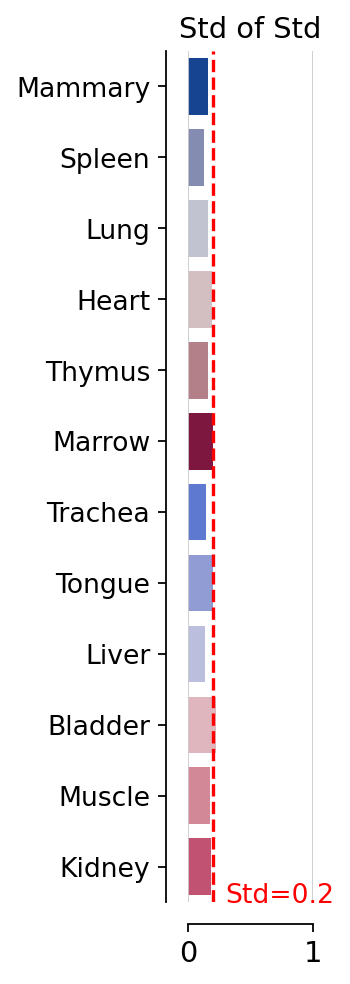

In [35]:
#定义图片大小
pp=plt.figure(figsize=(1,7))
#用ax控制图片
ax=pp.add_subplot(1,1,1)
x = [i.replace('TS_','') for i in list(human_std.keys())]
y1=[]
for i in human_std.keys():
    y1.append(np.std(human_std[i]))
sns.barplot(x=y1, y=x,ax=ax,palette=sc.pl.palettes.zeileis_28)
# 设置左边和下边的坐标轴线为独立的线段
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
plt.xlim(0,1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

ax.axvline(x=0.2, color='r', linestyle='--')
ax.text(0.3,len(human_std.keys())-0.5,'Std=0.2',fontsize=12,color='r')


plt.title('Std of Std',fontsize=13)
plt.yticks(fontsize=12)
plt.xticks(fontsize=13)

(array([0. , 0.5]), [Text(0.0, 0, '0.0'), Text(0.5, 0, '0.5')])

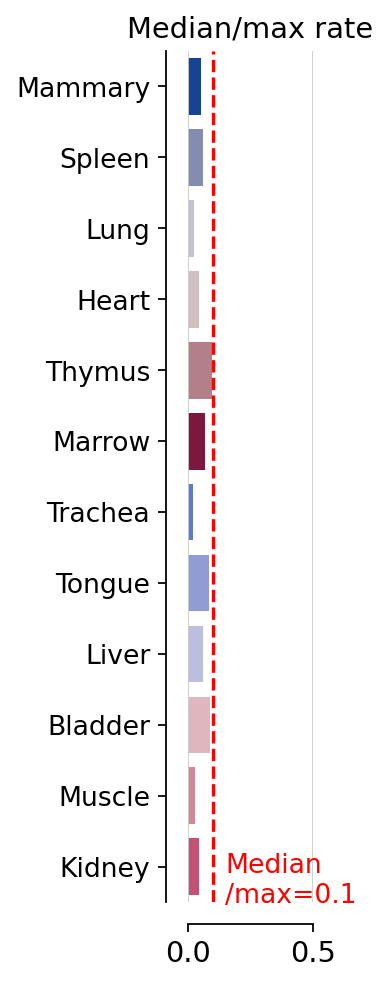

In [36]:
#定义图片大小
pp=plt.figure(figsize=(1,7))
#用ax控制图片
ax=pp.add_subplot(1,1,1)
x = [i.replace('TS_','') for i in list(human_std.keys())]
y1=[]
for i in human_median.keys():
    y1.append(np.std(np.array(human_median[i])/np.array(human_max[i])))
sns.barplot(x=y1, y=x,ax=ax,palette=sc.pl.palettes.zeileis_28)
# 设置左边和下边的坐标轴线为独立的线段
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
plt.xlim(0,0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

ax.axvline(x=0.1, color='r', linestyle='--')
ax.text(0.15,len(human_std.keys())-0.5,'Median\n/max=0.1',fontsize=12,color='r')


plt.title('Median/max rate',fontsize=13)
plt.yticks(fontsize=12)
plt.xticks(fontsize=13)

In [37]:
import numpy as np
import scipy.stats
p=corr_df.loc[corr_df['g']=='Liver','x'].values
q=corr_df.loc[corr_df['g']=='Tongue','x'].values
def KL_divergence(p,q):
    return scipy.stats.entropy(p, q)
print(KL_divergence(p,q)) # 0.011735745199107783
print(KL_divergence(q,p)) # 0.013183150978050884

def JS_divergence(p,q):
    M=(p+q)/2
    return 0.5*scipy.stats.entropy(p, M)+0.5*scipy.stats.entropy(q, M)

print(JS_divergence(p,q))  # 0.003093977084273652
print(JS_divergence(q,p)) # 0.24719159952098618


4.0754158406651415
3.167915139388201
0.4860527304579234
0.4860527304579234


In [10]:
sc.settings.verbosity=0

In [11]:
#re_dicts={}
import gc
import numpy as np
import pandas as pd
from tqdm import tqdm
human_std={}
human_median={}
human_max={}
human_min={}
human_mean={}
eval_dict={}
for e in [100,1000,2000,5000,10000]:
    for o in tqdm(organ_name):
        adata=sc.read_h5ad(f'data/mouse_h5ad/{o}_drop_raw.h5ad')
        adata.layers['counts']=adata.X.copy()
        sc.pp.normalize_total(adata)
        sc.pp.log1p(adata)
        sc.pp.highly_variable_genes(adata, n_top_genes=e, 
                                    flavor="seurat_v3",layer='counts',)
        adata=adata[:,adata.var['highly_variable']==True]


        #print('...stats')
        array=adata.X.toarray()
        del adata
        gc.collect()
        human_std[o]=np.std(array,axis=0)
        human_median[o]=np.median(array,axis=0)
        human_max[o]=np.max(array,axis=0)
        human_min[o]=np.min(array,axis=0)
        human_mean[o]=np.mean(array,axis=0)
        
        
        df=pd.DataFrame(columns=['x','g'])
        k=0
        for i in human_std.keys():
            df1=pd.DataFrame()
            df1['x']=human_std[i]
            df1['g']=[j for j in [i.replace('TS_','')]*len(df1)]
            df1['x1']=[j for j in [k]*len(df1)]
            df1['x']=df1['x']+df1['x1']
            del df1['x1']
            df=pd.concat([df,df1])
            k+=0

        import joypy
        corr_feature = ['x','g']
        corr_df = df[corr_feature]
        eval_dict[e]=corr_df

        #adata.__delete__()

        del array


100%|██████████| 17/17 [00:51<00:00,  3.01s/it]


In [81]:
eval_dict[100]

,x,g
0,1.182901,Liver
1,2.295066,Liver
2,2.016364,Liver
3,2.404137,Liver
4,2.137916,Liver
...,...,...
95,0.727631,Lung
96,1.446455,Lung
97,1.481830,Lung
98,1.909384,Lung


In [88]:
js_pd_dict={}
for e in [100,1000,2000,5000,10000]:
    js_pd=pd.DataFrame(index=organ_name,columns=organ_name)
    corr_df=eval_dict[e]
    for o1 in organ_name:
        for o2 in organ_name:
            p=corr_df.loc[corr_df['g']==o1,'x'].values
            q=corr_df.loc[corr_df['g']==o2,'x'].values
            js_pd.loc[o1,o2]=JS_divergence(p,q)
    js_pd_dict[e]=js_pd

In [109]:
for e in [100,1000,2000,5000,10000]:
    for o1 in organ_name:
        js_pd_dict[e][o1]=js_pd_dict[e][o1].astype(float)

In [132]:
for e in [100,1000,2000,5000,10000]:
    print(js_pd_dict[e].mean().mean())

0.04841918412256332
0.07841589251364801
0.09005899002018411
0.11316115872491027
0.17991579533832544


In [145]:
kl_pd_dict={}
for e in [100,1000,2000,5000,10000]:
    kl_pd=pd.DataFrame(index=organ_name,columns=organ_name)
    corr_df=eval_dict[e]
    for o1 in organ_name:
        for o2 in organ_name:
            p=corr_df.loc[corr_df['g']==o1,'x'].values
            q=corr_df.loc[corr_df['g']==o2,'x'].values
            kl_pd.loc[o1,o2]=KL_divergence(p,q)
    kl_pd_dict[e]=kl_pd

In [160]:
kl_pd_dict={}
for e in [100,1000,2000,5000,10000]:
    kl_pd=pd.DataFrame(index=organ_name,columns=organ_name)
    corr_df=eval_dict[e]
    for o1 in organ_name:
        for o2 in organ_name:
            p=corr_df.loc[corr_df['g']==o1,'x'].values
            q=corr_df.loc[corr_df['g']==o2,'x'].values
            kl_pd.loc[o1,o2]=scipy.stats.ks_2samp(p, q, 
                                                   alternative='two-sided', mode='auto')[0]
    kl_pd_dict[e]=kl_pd

In [26]:
for e in [100,1000,2000,5000,10000]:
    for o1 in organ_name:
        kl_pd_dict[e][o1]=kl_pd_dict[e][o1].astype(float)

In [15]:
for e in [100,1000,2000,5000,10000]:
    print(kl_pd_dict[e].mean().mean())

0.27432525951557085
0.18859515570934254
0.1605743944636678
0.13322629757785467
0.09929204152249134


[None, None, None]

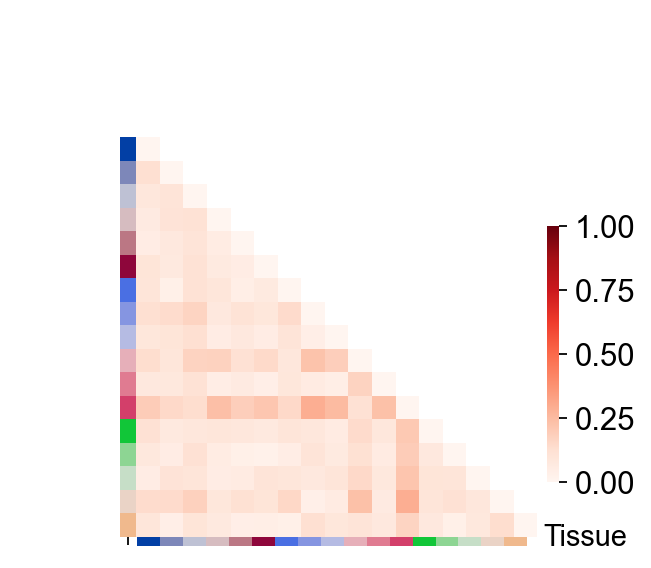

In [31]:
import seaborn as sns
mask = np.array(kl_pd_dict[10000])
mask[np.tril_indices_from(mask)] = False #下三角
g=sns.clustermap(kl_pd_dict[10000],cmap='Reds',mask=mask,yticklabels=True,xticklabels=True,
           square=True,annot=False,col_cluster=False,row_cluster=False,vmax=1,
                 row_colors=data_df,col_colors=data_df
              )
g.fig.set_size_inches(4, 4)
g.ax_col_colors.set_position([0.21, 0.15, 0.61, 0.035]) 
g.ax_heatmap.set_xticks([])
g.ax_heatmap.set_yticks([])
g.cax.set_position([0.85, 0.25, 0.02, 0.4])  # Adjust the position as needed
g.ax_row_colors.xaxis.set_ticklabels([])
labels=g.ax_col_colors.yaxis.get_ticklabels()
plt.setp(labels, horizontalalignment='left',fontsize=13)

In [ ]:

import joypy
corr_feature = ['x','g']
corr_df = eval_dict[100]
fig, axes = joypy.joyplot(corr_df,column = 'x', by='g', figsize=(4,6.5),x_range=[-0.2,5],
                          fill=True, fade=True,color=sc.pl.palettes.zeileis_28)
plt.suptitle('Standard Deviation',fontsize=13,y=0.95,horizontalalignment='left') 
plt.xticks(fontsize=13)

In [ ]:
import joypy

(array([0., 2., 4.]),
 [Text(0.0, 0, '0'), Text(2.0, 0, '2'), Text(4.0, 0, '4')])

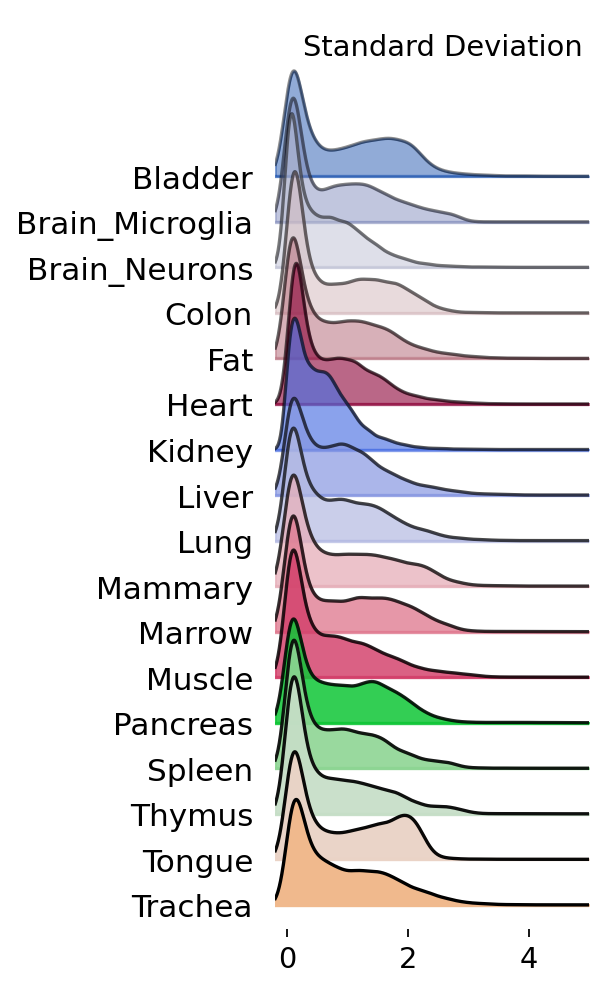

In [151]:

import joypy
corr_feature = ['x','g']
corr_df = eval_dict[10000]
fig, axes = joypy.joyplot(corr_df,column = 'x', by='g', figsize=(4,6.5),x_range=[-0.2,5],
                          fill=True, fade=True,color=sc.pl.palettes.zeileis_28)
plt.suptitle('Standard Deviation',fontsize=13,y=0.95,horizontalalignment='left') 
plt.xticks(fontsize=13)

In [4]:
import scanpy as sc
adata1=sc.read('data/mouse_10x.h5ad')
adata1.obs['source']='10x'
adata2=sc.read('data/mouse_drop.h5ad')
adata2.obs['source']='drop'
adata=sc.concat([adata1,adata2],merge='same')

In [5]:
organ_ad=adata

In [6]:
organ_name=list(set(organ_ad.obs.loc[organ_ad.obs['source']=='10x','organ'].tolist()))
organ_name

['Liver',
 'Thymus',
 'Heart',
 'Lung',
 'Muscle',
 'Bladder',
 'Marrow',
 'Mammary',
 'Kidney',
 'Trachea',
 'Tongue',
 'Spleen']

In [196]:
import scanpy as sc
data_dict=dict(zip(list(set(organ_ad.obs['organ'])),sc.pl.palettes.default_102))

In [197]:
data_df = pd.DataFrame(data_dict.items(), columns=['index', 'Tissue'])
data_df=data_df.set_index(data_df.columns[0])

In [80]:
organ_ad.layers['counts']=organ_ad.X.copy()
sc.pp.normalize_total(organ_ad)
sc.pp.log1p(organ_ad)

In [81]:
#re_dicts={}
import gc
import numpy as np
human_std1={}
human_median1={}
human_max1={}
human_min1={}
human_mean1={}
organ_name=list(set(organ_ad.obs.loc[organ_ad.obs['source']=='10x','organ'].tolist()))
for o in tqdm(organ_name):
    adata=organ_ad[organ_ad.obs['organ']==o]
    adata=adata[adata.obs['source']=='10x']
    sc.pp.highly_variable_genes(adata, n_top_genes=10000, 
                                flavor="seurat_v3",layer='counts',)
    adata=adata[:,adata.var['highly_variable']==True]
    #print('...stats')
    array=adata.X.toarray()
    del adata
    gc.collect()
    human_std1[o]=np.std(array,axis=0)
    human_median1[o]=np.median(array,axis=0)
    human_max1[o]=np.max(array,axis=0)
    human_min1[o]=np.min(array,axis=0)
    human_mean1[o]=np.mean(array,axis=0)

    #adata.__delete__()

    del array

  #re_dicts[name]=re_dict
  #ret_gene=list(set(ret_gene) & set(gene))

100%|██████████| 12/12 [00:18<00:00,  1.57s/it]


In [82]:
#re_dicts={}
import gc
import numpy as np
human_std2={}
human_median2={}
human_max2={}
human_min2={}
human_mean2={}
organ_name=list(set(organ_ad.obs.loc[organ_ad.obs['source']=='drop','organ'].tolist()))
for o in tqdm(organ_name):
    adata=organ_ad[organ_ad.obs['organ']==o]
    adata=adata[adata.obs['source']=='drop']
    sc.pp.highly_variable_genes(adata, n_top_genes=10000, 
                                flavor="seurat_v3",layer='counts',)
    adata=adata[:,adata.var['highly_variable']==True]
    #print('...stats')
    array=adata.X.toarray()
    del adata
    gc.collect()
    human_std2[o]=np.std(array,axis=0)
    human_median2[o]=np.median(array,axis=0)
    human_max2[o]=np.max(array,axis=0)
    human_min2[o]=np.min(array,axis=0)
    human_mean2[o]=np.mean(array,axis=0)

    #adata.__delete__()

    del array

  #re_dicts[name]=re_dict
  #ret_gene=list(set(ret_gene) & set(gene))

100%|██████████| 17/17 [00:30<00:00,  1.77s/it]


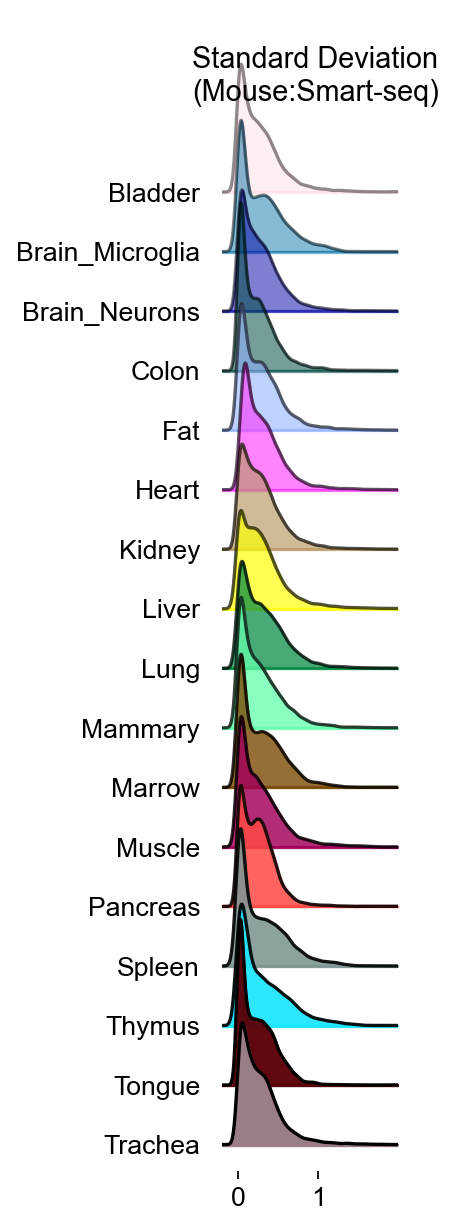

In [230]:
df=pd.DataFrame(columns=['x','g'])
k=0
for i in human_std2.keys():
  df1=pd.DataFrame()
  df1['x']=human_std2[i]
  df1['g']=[j for j in [i.replace('TS_','')]*len(df1)]
  df1['x1']=[j for j in [k]*len(df1)]
  df1['x']=df1['x']+df1['x1']
  del df1['x1']
  df=pd.concat([df,df1])
  k+=0

import joypy
corr_feature = ['x','g']
corr_df = df[corr_feature]
fig, axes = joypy.joyplot(corr_df,column = 'x', by='g', figsize=(3,8),x_range=[-0.2,2],
                          fill=True, fade=True,color=data_df.loc[key_li,'Tissue'].tolist())
plt.suptitle('Standard Deviation\n(Mouse:Smart-seq)',fontsize=13,y=0.95,horizontalalignment='left') 
plt.xticks(fontsize=13)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
for ax in axes:
    ax.set_yticklabels(ax.get_yticklabels(),fontsize=12)

plt.savefig(f"figures/fig1/fig_std_distri_smartseq_mouse.png",dpi=300,bbox_inches = 'tight')
plt.savefig(f"pdf/fig1/fig_std_distri_smartseq_mouse.pdf",dpi=300,bbox_inches = 'tight')

In [233]:
import scipy.stats
organ_name=list(set(corr_df['g']))
kl_pd=pd.DataFrame(index=organ_name,columns=organ_name)
for o1 in organ_name:
    for o2 in organ_name:
        p=corr_df.loc[corr_df['g']==o1,'x'].values
        q=corr_df.loc[corr_df['g']==o2,'x'].values
        kl_pd.loc[o1,o2]=scipy.stats.ks_2samp(p, q, 
                                               alternative='two-sided', mode='auto')[0]
        
for o1 in organ_name:
    kl_pd[o1]=kl_pd[o1].astype(float)

In [ ]:
import scanpy as sc
data_dict=dict(zip(kl_pd.index.tolist(),sc.pl.palettes.default_102))

In [171]:
data_df = pd.DataFrame(data_dict.items(), columns=['index', 'Tissue'])
data_df=data_df.set_index(data_df.columns[0])

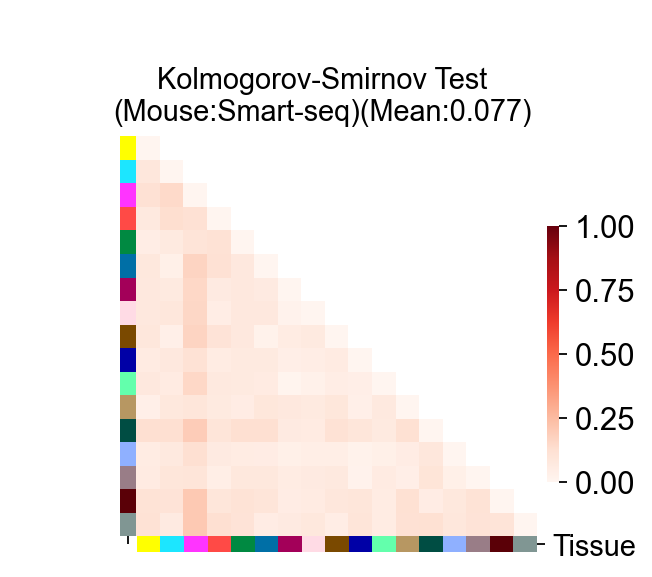

In [234]:
import seaborn as sns
mask = np.array(kl_pd)
mask[np.tril_indices_from(mask)] = False #下三角
g=sns.clustermap(kl_pd,cmap='Reds',mask=mask,yticklabels=True,xticklabels=True,
           square=True,annot=False,col_cluster=False,row_cluster=False,vmax=1,
                 row_colors=data_df,col_colors=data_df
              )
g.fig.set_size_inches(4, 4)
g.ax_col_colors.set_position([0.21, 0.14, 0.625, 0.025]) 
g.ax_heatmap.set_xticks([])
g.ax_heatmap.set_yticks([])
g.cax.set_position([0.85, 0.25, 0.02, 0.4])  # Adjust the position as neededg.ax_row_colors.xaxis.set_ticklabels([])
labels=g.ax_col_colors.yaxis.get_ticklabels()
g.ax_row_colors.xaxis.set_ticklabels([])
plt.setp(labels, horizontalalignment='left',fontsize=13)
g.fig.suptitle('Kolmogorov-Smirnov Test\n(Mouse:Smart-seq)(Mean:{:.2})'.format(kl_pd.mean().mean()),x=0.5,y=0.9,fontsize=13)
plt.savefig("figures/fig1/fig_ks_2samp_smartseq_mouse.png",dpi=300,bbox_inches = 'tight')
plt.savefig("pdf/fig1/fig_ks_2samp_smartseq_mouse.pdf",dpi=300,bbox_inches = 'tight')

In [175]:
data_df

,Tissue
index,
Liver,#FFFF00
Thymus,#1CE6FF
Heart,#FF34FF
Pancreas,#FF4A46
Lung,#008941
Brain_Microglia,#006FA6
Muscle,#A30059
Bladder,#FFDBE5
Marrow,#7A4900


In [182]:
def _grouped_df_to_standard(grouped, column):
    converted = []
    labels = []
    for i, (key, group) in enumerate(grouped):
        if column is not None:
            group = group[column]
        labels.append(key)
        converted.append([_remove_na(group[c]) for c in group.columns if _is_numeric(group[c])])
        if i == 0:
            sublabels = [col for col in group.columns if _is_numeric(group[col])]
    return converted, labels, sublabels


In [199]:
grouped=corr_df.groupby('g')
key_li=[]
for i, (key, group) in enumerate(grouped):
    key_li.append(key)

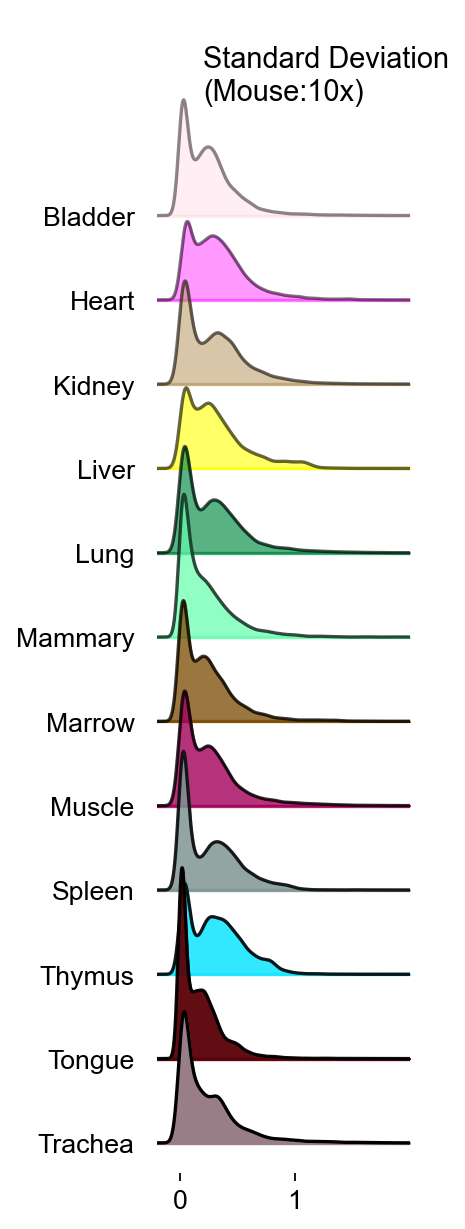

In [200]:
df=pd.DataFrame(columns=['x','g'])
k=0
for i in human_std1.keys():
  df1=pd.DataFrame()
  df1['x']=human_std1[i]
  df1['g']=[j for j in [i.replace('TS_','')]*len(df1)]
  df1['x1']=[j for j in [k]*len(df1)]
  df1['x']=df1['x']+df1['x1']
  del df1['x1']
  df=pd.concat([df,df1])
  k+=0

import joypy
corr_feature = ['x','g']
corr_df = df[corr_feature]
fig, axes = joypy.joyplot(corr_df,column = 'x', by='g', figsize=(3,8),x_range=[-0.2,2],
                          fill=True, fade=True,color=data_df.loc[key_li,'Tissue'].tolist())
plt.suptitle('Standard Deviation\n(Mouse:10x)',fontsize=13,y=0.95,horizontalalignment='left') 
plt.xticks(fontsize=13)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
for ax in axes:
    ax.set_yticklabels(ax.get_yticklabels(),fontsize=12)

plt.savefig(f"figures/fig1/fig_std_distri_10x_mouse.png",dpi=300,bbox_inches = 'tight')
plt.savefig(f"pdf/fig1/fig_std_distri_10x_mouse.pdf",dpi=300,bbox_inches = 'tight')

In [202]:
import scipy.stats
organ_name=list(set(corr_df['g']))
kl_pd=pd.DataFrame(index=organ_name,columns=organ_name)
for o1 in organ_name:
    for o2 in organ_name:
        p=corr_df.loc[corr_df['g']==o1,'x'].values
        q=corr_df.loc[corr_df['g']==o2,'x'].values
        kl_pd.loc[o1,o2]=scipy.stats.ks_2samp(p, q, 
                                               alternative='two-sided', mode='auto')[0]
        
for o1 in organ_name:
    kl_pd[o1]=kl_pd[o1].astype(float)

In [135]:
import scanpy as sc
data_dict=dict(zip(kl_pd.index.tolist(),sc.pl.palettes.default_102))

In [136]:
data_df = pd.DataFrame(data_dict.items(), columns=['index', 'Tissue'])
data_df=data_df.set_index(data_df.columns[0])

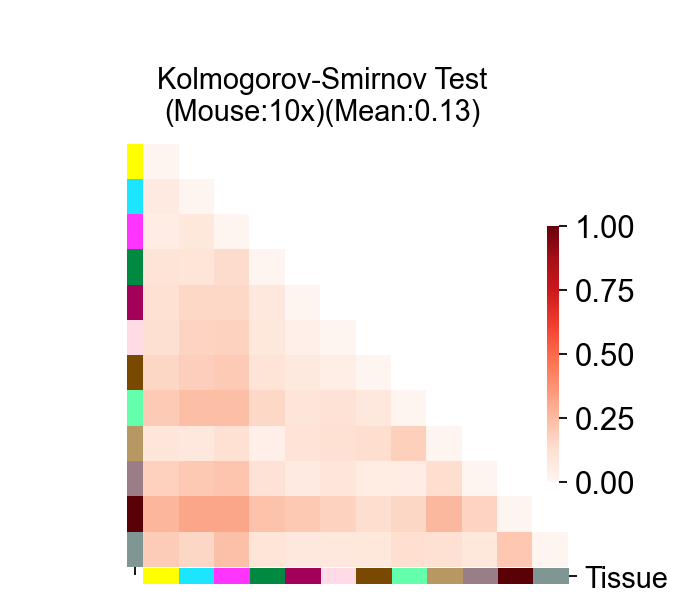

In [203]:
import seaborn as sns
mask = np.array(kl_pd)
mask[np.tril_indices_from(mask)] = False #下三角
g=sns.clustermap(kl_pd,cmap='Reds',mask=mask,yticklabels=True,xticklabels=True,
           square=True,annot=False,col_cluster=False,row_cluster=False,vmax=1,
                 row_colors=data_df,col_colors=data_df
              )
g.fig.set_size_inches(4, 4)
g.ax_col_colors.set_position([0.22, 0.09, 0.665, 0.025]) 
g.ax_heatmap.set_xticks([])
g.ax_heatmap.set_yticks([])
g.cax.set_position([0.85, 0.25, 0.02, 0.4])  # Adjust the position as neededg.ax_row_colors.xaxis.set_ticklabels([])
labels=g.ax_col_colors.yaxis.get_ticklabels()
g.ax_row_colors.xaxis.set_ticklabels([])
plt.setp(labels, horizontalalignment='left',fontsize=13)
g.fig.suptitle('Kolmogorov-Smirnov Test\n(Mouse:10x)(Mean:{:.2})'.format(kl_pd.mean().mean()),x=0.5,y=0.9,fontsize=13)
plt.savefig("figures/fig1/fig_ks_2samp_10x_mouse.png",dpi=300,bbox_inches = 'tight')
plt.savefig("pdf/fig1/fig_ks_2samp_10x_mouse.pdf",dpi=300,bbox_inches = 'tight')

In [204]:
from scipy import stats
human_std_pd=pd.DataFrame(index=human_std.keys())
for i in human_std.keys():
    human_std_test=[]
    mu_i=np.mean(human_std[i])
    sigma_i=np.std(human_std[i])
    count_i,bins_i=np.histogram(human_std[i],bins=100)
    y_i=stats.norm.pdf(bins_i, mu_i, sigma_i)
    for j in human_std.keys():
        mu_j=np.mean(human_std[j])
        sigma_j=np.std(human_std[j])
        count_j,bins_j=np.histogram(human_std[j],bins=100)
        y_j=stats.norm.pdf(bins_j, mu_j, sigma_j)
        human_std_test.append(stats.spearmanr(y_i,y_j)[0])
    human_std_pd[i]=human_std_test
human_std_pd.head()

,Liver,Thymus,Heart,Pancreas,Lung,Brain_Microglia,Muscle,Bladder,Marrow,Brain_Neurons,Mammary,Kidney,Colon,Fat,Trachea,Tongue,Spleen
Liver,1.000000,0.999056,0.997927,0.992347,0.999755,0.975248,0.997927,0.999010,0.999010,0.970961,0.999755,0.974421,0.999056,0.997927,0.999056,0.987874,0.999755
Thymus,0.999056,1.000000,0.999767,0.996599,0.997880,0.966034,0.999767,0.996226,0.996226,0.979208,0.999767,0.982236,1.000000,0.999767,1.000000,0.980897,0.999767
Heart,0.997927,0.999767,1.000000,0.998090,0.996319,0.961118,1.000000,0.994246,0.994246,0.982819,0.999080,0.985614,0.999767,1.000000,0.999767,0.976995,0.999080
Pancreas,0.992347,0.996599,0.998090,1.000000,0.989586,0.945579,0.998090,0.986395,0.986395,0.991578,0.994688,0.993605,0.996599,0.998090,0.996599,0.964077,0.994688
Lung,0.999755,0.997880,0.996319,0.989586,1.000000,0.979476,0.996319,0.999744,0.999744,0.966325,0.999033,0.969983,0.997880,0.996319,0.997880,0.990879,0.999033


In [ ]:
import scanpy as sc
data_dict=dict(zip(human_std_pd.index.tolist(),sc.pl.palettes.default_102))
data_df = pd.DataFrame(data_dict.items(), columns=['index', 'Tissue'])
data_df=data_df.set_index(data_df.columns[0])

g=sns.clustermap(human_std_pd,cmap='Reds',mask=mask,yticklabels=True,xticklabels=True,
           square=True,annot=False,vmax=1, vmin=0.95,col_cluster=False,row_cluster=False,
                 row_colors=data_df,col_colors=data_df
              )
g.fig.set_size_inches(4, 4)
g.ax_col_colors.set_position([0.21, 0.138, 0.625, 0.025]) 
g.ax_heatmap.set_xticks([])
g.ax_heatmap.set_yticks([])
g.cax.set_position([0.85, 0.25, 0.02, 0.4])  # Adjust the position as needed
g.ax_row_colors.xaxis.set_ticklabels([])
labels=g.ax_col_colors.yaxis.get_ticklabels()
plt.setp(labels, horizontalalignment='left',fontsize=13)
g.fig.suptitle('Std distribution Correlation\n(Mouse)',x=0.5,y=0.9,fontsize=13)
plt.savefig("figures/fig1/fig_std_cor_mouse.png",dpi=300,bbox_inches = 'tight')
plt.savefig("pdf/fig1/fig_std_cor_mouse.pdf",dpi=300,bbox_inches = 'tight')

In [148]:
kl_pd=kl_pd.loc[[i.replace('TS_','') for i in human_std_pd.index.tolist()],
         [i.replace('TS_','') for i in human_std_pd.index.tolist()]]

In [151]:
import scanpy as sc
data_dict=dict(zip(kl_pd_dict[10000].index.tolist(),sc.pl.palettes.default_102))

In [152]:
data_df = pd.DataFrame(data_dict.items(), columns=['index', 'Tissue'])
data_df=data_df.set_index(data_df.columns[0])

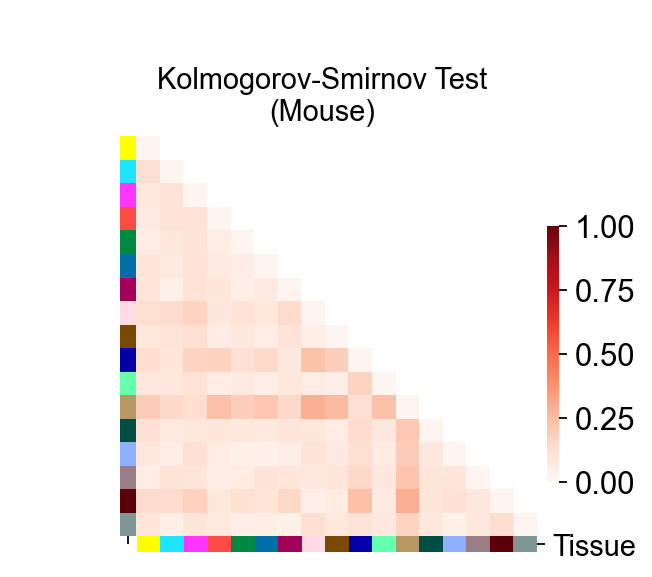

In [153]:
import seaborn as sns
mask = np.array(kl_pd_dict[10000])
mask[np.tril_indices_from(mask)] = False #下三角
g=sns.clustermap(kl_pd_dict[10000],cmap='Reds',mask=mask,yticklabels=True,xticklabels=True,
           square=True,annot=False,col_cluster=False,row_cluster=False,vmax=1,
                 row_colors=data_df,col_colors=data_df
              )
g.fig.set_size_inches(4, 4)
g.ax_col_colors.set_position([0.21, 0.14, 0.625, 0.025]) 
g.ax_heatmap.set_xticks([])
g.ax_heatmap.set_yticks([])
g.cax.set_position([0.85, 0.25, 0.02, 0.4])  # Adjust the position as neededg.ax_row_colors.xaxis.set_ticklabels([])
labels=g.ax_col_colors.yaxis.get_ticklabels()
g.ax_row_colors.xaxis.set_ticklabels([])
plt.setp(labels, horizontalalignment='left',fontsize=13)
g.fig.suptitle('Kolmogorov-Smirnov Test\n(Mouse)',x=0.5,y=0.9,fontsize=13)
plt.savefig("figures/fig1/fig_ks_2samp_mouse.png",dpi=300,bbox_inches = 'tight')
plt.savefig("pdf/fig1/fig_ks_2samp_mouse.pdf",dpi=300,bbox_inches = 'tight')

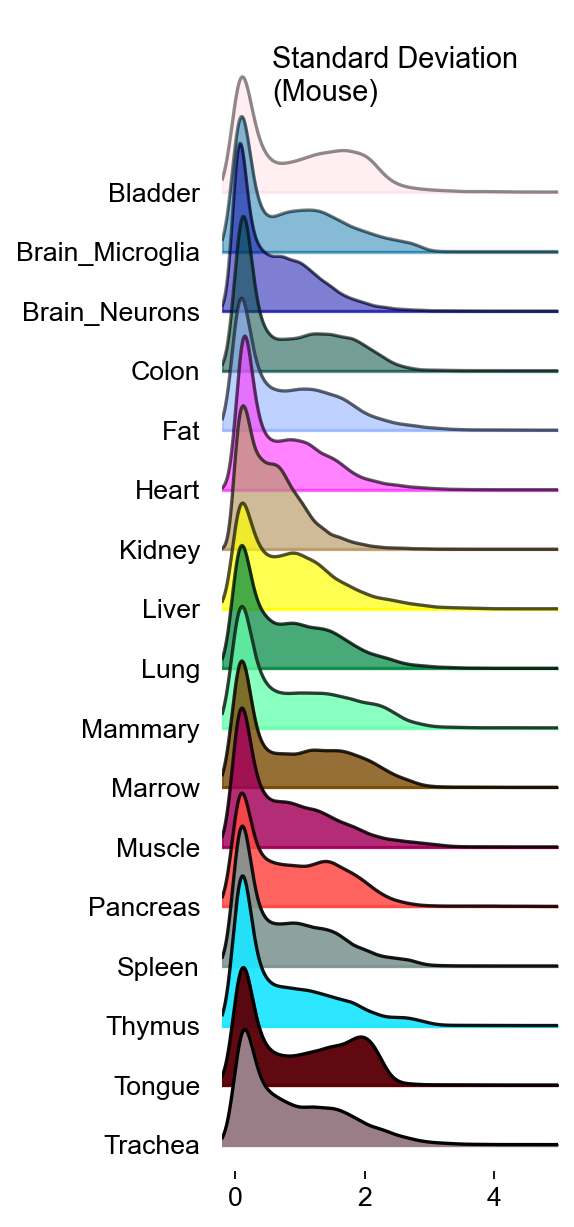

In [206]:
df=pd.DataFrame(columns=['x','g'])
k=0
for i in human_std.keys():
    df1=pd.DataFrame()
    df1['x']=human_std[i]
    df1['g']=[j for j in [i.replace('TS_','')]*len(df1)]
    df1['x1']=[j for j in [k]*len(df1)]
    df1['x']=df1['x']+df1['x1']
    del df1['x1']
    df=pd.concat([df,df1])
    k+=0

import joypy
corr_feature = ['x','g']
corr_df = df[corr_feature]

grouped=corr_df.groupby('g')
key_li=[]
for i, (key, group) in enumerate(grouped):
    key_li.append(key)

fig, axes = joypy.joyplot(corr_df,column = 'x', by='g', figsize=(4,8),x_range=[-0.2,5],
                          fill=True, fade=True,color=data_df.loc[key_li,'Tissue'].tolist())
plt.suptitle('Standard Deviation\n(Mouse)',fontsize=13,y=0.95,horizontalalignment='left') 
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
for ax in axes:
    ax.set_yticklabels(ax.get_yticklabels(),fontsize=12)

plt.savefig("figures/fig1/fig_std_distri_mouse.png",dpi=300,bbox_inches = 'tight')
plt.savefig("pdf/fig1/fig_std_distri_mouse.pdf",dpi=300,bbox_inches = 'tight')

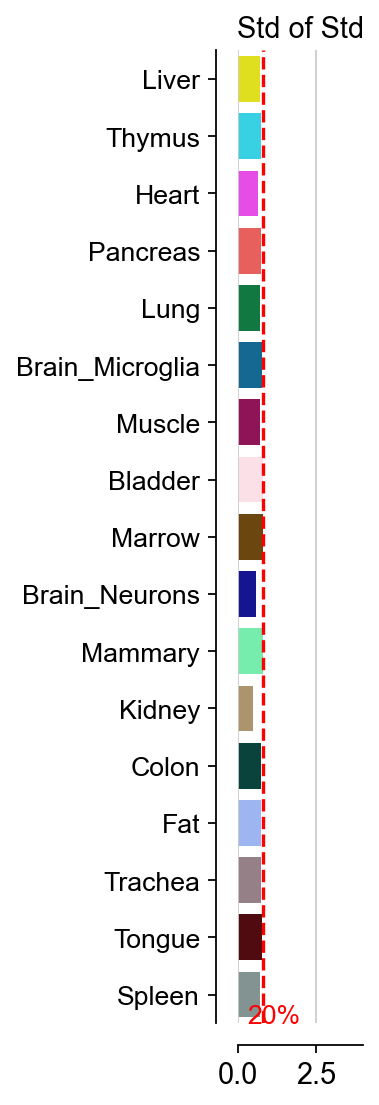

In [208]:
#定义图片大小
pp=plt.figure(figsize=(1,8))
#用ax控制图片
ax=pp.add_subplot(1,1,1)
x = [i.replace('TS_','') for i in list(human_std.keys())]
y1=[]
for i in human_std.keys():
    y1.append(np.std(human_std[i]))
sns.barplot(x=y1, y=x,ax=ax,palette=data_df.loc[human_std.keys(),'Tissue'].tolist())
# 设置左边和下边的坐标轴线为独立的线段
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
plt.xlim(0,4)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

ax.axvline(x=4*0.2, color='r', linestyle='--')
ax.text(0.3,len(human_std.keys())-0.5,'20%',fontsize=12,color='r')


plt.title('Std of Std',fontsize=13)
plt.yticks(fontsize=12)
plt.xticks(fontsize=13)

plt.savefig("figures/fig1/fig_std_std_mouse.png",dpi=300,bbox_inches = 'tight')
plt.savefig("pdf/fig1/fig_std_std_mouse.pdf",dpi=300,bbox_inches = 'tight')

In [156]:
eval_dict.keys()

dict_keys([100, 1000, 2000, 5000, 10000])

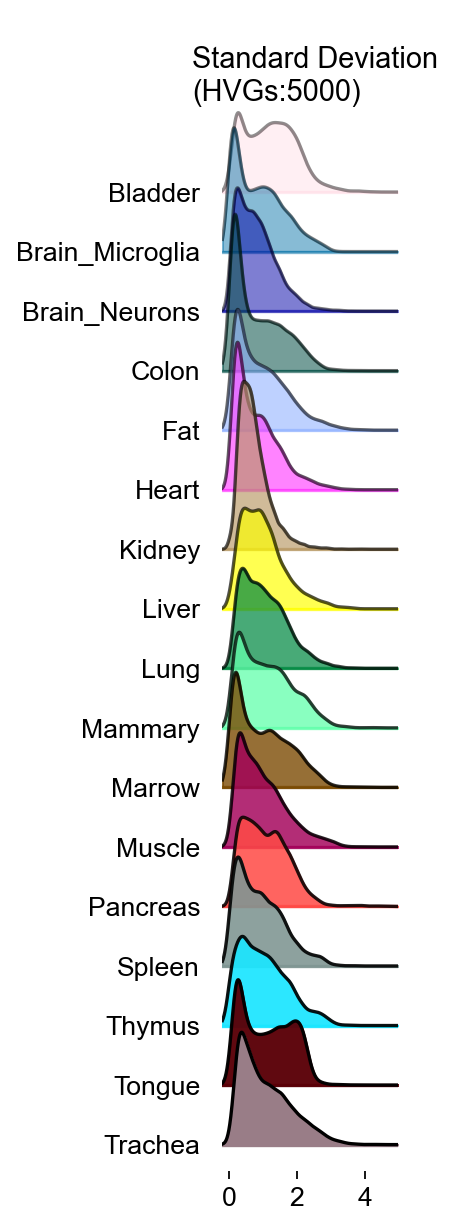

In [228]:

import joypy
size=5000
corr_feature = ['x','g']
corr_df = eval_dict[size]

grouped=corr_df.groupby('g')
key_li=[]
for i, (key, group) in enumerate(grouped):
    key_li.append(key)

fig, axes = joypy.joyplot(corr_df,column = 'x', by='g', figsize=(3,8),x_range=[-0.2,5],
                          fill=True, fade=True,color=data_df.loc[key_li,'Tissue'].tolist())
plt.suptitle(f'Standard Deviation\n(HVGs:{size})',fontsize=13,y=0.95,horizontalalignment='left') 
plt.xticks(fontsize=13)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
for ax in axes:
    ax.set_yticklabels(ax.get_yticklabels(),fontsize=12)

plt.savefig(f"figures/fig1/fig_std_distri_{size}_mouse.png",dpi=300,bbox_inches = 'tight')
plt.savefig(f"pdf/fig1/fig_std_distri_{size}_mouse.pdf",dpi=300,bbox_inches = 'tight')

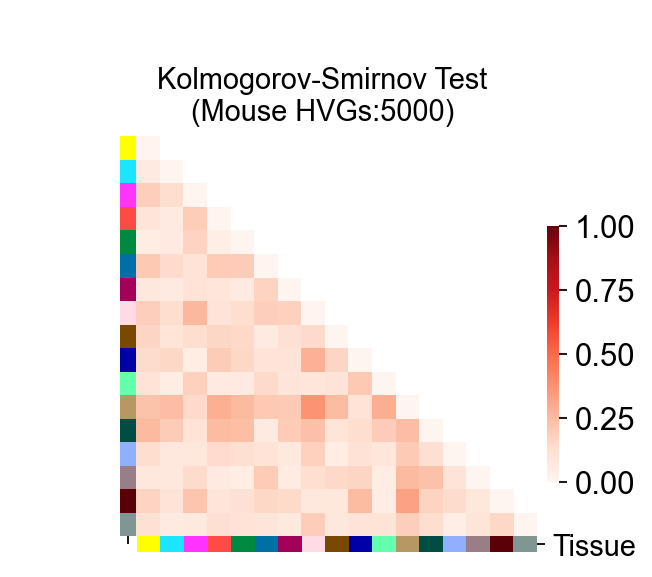

In [229]:
import seaborn as sns

mask = np.array(kl_pd_dict[size])
mask[np.tril_indices_from(mask)] = False #下三角
g=sns.clustermap(kl_pd_dict[size],cmap='Reds',mask=mask,yticklabels=True,xticklabels=True,
           square=True,annot=False,col_cluster=False,row_cluster=False,vmax=1,
                 row_colors=data_df,col_colors=data_df
              )
g.fig.set_size_inches(4, 4)
g.ax_col_colors.set_position([0.21, 0.14, 0.625, 0.025]) 
g.ax_heatmap.set_xticks([])
g.ax_heatmap.set_yticks([])
g.cax.set_position([0.85, 0.25, 0.02, 0.4])  # Adjust the position as neededg.ax_row_colors.xaxis.set_ticklabels([])
labels=g.ax_col_colors.yaxis.get_ticklabels()
g.ax_row_colors.xaxis.set_ticklabels([])
plt.setp(labels, horizontalalignment='left',fontsize=13)
g.fig.suptitle(f'Kolmogorov-Smirnov Test\n(Mouse HVGs:{size})',x=0.5,y=0.9,fontsize=13)
plt.savefig(f"figures/fig1/fig_ks_2samp_{size}_mouse.png",dpi=300,bbox_inches = 'tight')
plt.savefig(f"pdf/fig1/fig_ks_2samp_{size}_mouse.pdf",dpi=300,bbox_inches = 'tight')